# Homework11: Time Series Analysis

**1.	What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?**

**Answer:** Continuous numerical data (specifically, interval scale) applies to time series analyses. Time series data is continuous because one could technically slice the data infinitely. Even if visualizing or grouping data by years, months, quarters, etc. there are infinite ways to slice time. Discrete variables are more 'countable' such as the number of books on your bookshelf.

**2.	What does ARIMA stand for? Break down and explain each piece in the name.**

**Answer:** ARIMA stands for "Autoregressive Integrated Moving Average." 

*Autoregressive* means that the predictive variable is regressed on itself (its own prior values) in order to predict an outcome.

*Integrated* means that the values in the model represent a difference. Specifically, the difference between the current value and the previous value. 

*Moving Averages* represent an average that is dynamically and reflexively changing based on prior data points. For example, the 7-day 'moving average' on December 1, 2021 will be calculated based on data 7 days prior to that date. The 7-day 'moving average' on December 10th, 2021 will be calculated based on data 7 days prior to *that* date.

In sum, an ARIMA model can be used to forecast time series data. We can use trends in a variable of interest to predict the outcome of that variable. 

**3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.**

In [1]:
# Load necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data file
temp = pd.read_csv('temperature.csv')

# Inspect the data
temp_df = pd.DataFrame(temp)
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,10/1/2012 13:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,10/1/2012 14:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,10/1/2012 15:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
4,10/1/2012 16:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [2]:
# Create a function that converts Kelvin into Fahrenheit
def Fahrenheit(K):
    # Formular for Fahrenheit
    F = ((K - 273.15)*(9/5))+32
    return F

In [3]:
# Create an empty list to append city names to
city_list = []

# Iterate through columns in data frame and append the city name to the list
for col in temp_df.columns:
    if col != 'datetime':
        city_list.append(col)

# print list to confirm
print(city_list)

['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem']


In [4]:
# Call every column name (from city_list)
# Apply the function we just made to every single column
temp_df[city_list] = temp_df[city_list].apply(Fahrenheit)

# Print first few rows to confirm it worked
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,10/1/2012 13:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,10/1/2012 14:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,10/1/2012 15:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,10/1/2012 16:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


In [5]:
# Reassign data frame to new variable
temp_df_F = temp_df

**4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.**

In [8]:
# Count the NaNs per city to get an overview
# Use 'city_list' from earlier
temp_df_F[city_list].isna().sum()

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [9]:
# This is a 'test' slice of the data to see where some of the non-trailing NaNs are
temp_df_F.iloc[3857:3863]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
3857,3/11/2013 5:00,42.980,43.646,51.3860,42.260,52.412,49.208,53.402,48.974,34.4480,...,34.664,36.644,28.904,28.292,55.1300,54.698,56.6870,60.1700,48.002,51.818
3858,3/11/2013 6:00,42.098,41.900,50.1620,40.370,51.188,48.056,51.386,46.814,33.8360,...,33.440,34.376,27.932,27.608,55.1300,59.000,56.3900,60.1700,51.854,55.706
3859,3/11/2013 7:00,NaN,40.328,47.9264,39.320,NaN,47.600,50.366,NaN,29.1524,...,NaN,33.596,NaN,NaN,61.2884,61.961,62.8070,61.4684,NaN,57.212
3860,3/11/2013 8:00,NaN,38.756,45.6908,38.270,NaN,47.144,49.346,NaN,24.4688,...,NaN,32.816,NaN,NaN,67.4468,64.922,69.2240,62.7668,NaN,58.718
3861,3/11/2013 9:00,41.468,37.184,46.8140,37.220,48.974,46.688,48.326,43.610,31.0460,...,29.822,32.036,29.192,26.924,63.7700,65.156,71.6000,63.4100,63.410,60.224
3862,3/11/2013 10:00,41.882,35.726,45.8780,36.554,47.624,45.626,48.938,42.206,28.2020,...,28.940,30.956,27.338,26.276,67.3700,65.390,70.3526,63.7700,55.004,60.368


In [221]:
# ffill: fills the missing values with the value from the previous cell
# bfill: fills the missing values with the value from proceeding cell

# Define function called "fill NaN, leave trail" shortened as 'fNaN_ltrail()'
# Take in one argument, which is a data set
def fNaN_ltrail(df):
    #import pandas module
    import pandas as pd
    # Use Try, Except for error handling
    try:
        # create deep copy of df object to avoid issues of one dataframe being the reference to another
        new_df = df.copy()
        # Forward fill the NaNs, using the previous cell value
            # However, only complete this action where the back fill would be a value (i.e. not null)
            # this will leave the trailing NaNs at the end of each column
        final_df = new_df.ffill(axis=0).where(new_df.bfill().notnull())
        return final_df
    # Print the error, if there is one
    except Exception as e:
        print(e)

In [222]:
# Test function on our data frame to see if it worked
X = fNaN_ltrail(temp_df_F)
X # trailing NaNs are still there

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,47.930000,NaN,45.806000,68.720000,66.200000,61.502000,70.808000,54.626000,...,62.762000,NaN,35.564000,58.874000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,49.532000,NaN,47.300000,72.554000,67.262000,63.428000,72.392000,55.940000,...,60.962000,NaN,33.764000,55.166000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,50.432000,NaN,49.280000,73.058000,66.974000,64.742000,73.580000,55.922000,...,56.534000,NaN,32.594000,51.422000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,49.766000,NaN,49.658000,72.500000,67.028000,66.200000,75.200000,55.382000,...,52.556000,NaN,30.794000,48.236000,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Check our test location to confirm that the middle NaNs are gone
X.iloc[3857:3863] # middle NaNs are gone!

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
3857,3/11/2013 5:00,42.980,43.646,51.3860,42.260,52.412,49.208,53.402,48.974,34.4480,...,34.664,36.644,28.904,28.292,55.1300,54.698,56.6870,60.1700,48.002,51.818
3858,3/11/2013 6:00,42.098,41.900,50.1620,40.370,51.188,48.056,51.386,46.814,33.8360,...,33.440,34.376,27.932,27.608,55.1300,59.000,56.3900,60.1700,51.854,55.706
3859,3/11/2013 7:00,42.098,40.328,47.9264,39.320,51.188,47.600,50.366,46.814,29.1524,...,33.440,33.596,27.932,27.608,61.2884,61.961,62.8070,61.4684,51.854,57.212
3860,3/11/2013 8:00,42.098,38.756,45.6908,38.270,51.188,47.144,49.346,46.814,24.4688,...,33.440,32.816,27.932,27.608,67.4468,64.922,69.2240,62.7668,51.854,58.718
3861,3/11/2013 9:00,41.468,37.184,46.8140,37.220,48.974,46.688,48.326,43.610,31.0460,...,29.822,32.036,29.192,26.924,63.7700,65.156,71.6000,63.4100,63.410,60.224
3862,3/11/2013 10:00,41.882,35.726,45.8780,36.554,47.624,45.626,48.938,42.206,28.2020,...,28.940,30.956,27.338,26.276,67.3700,65.390,70.3526,63.7700,55.004,60.368


In [29]:
# Count the NaNs per city to get an overview
# Use 'city_list' from earlier
X[city_list].isna().sum() # This looks accurate now! It appears the function worked

Vancouver            793
Portland               1
San Francisco        793
Seattle                1
Los Angeles            1
San Diego              1
Las Vegas              1
Phoenix                1
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 1
Houston                1
Kansas City            1
Minneapolis            1
Saint Louis            1
Chicago                1
Nashville              1
Indianapolis           1
Atlanta                1
Detroit                1
Jacksonville           1
Charlotte              1
Miami                793
Pittsburgh             1
Toronto                1
Philadelphia           1
New York             793
Montreal               1
Boston                 1
Beersheba            793
Tel Aviv District    793
Eilat                792
Haifa                793
Nahariyya            793
Jerusalem            793
dtype: int64

**5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.**

In [30]:
# First, parse out the 'month' from the 'datetime' variable
months = pd.DatetimeIndex(temp['datetime']).month

# group by months
temp_month = temp.groupby(months)

# Find the average temperature per month for every city
avg_temp = temp_month.mean()

In [31]:
# Slice to only have summer months
summer = avg_temp.iloc[5:8,:]
summer

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
6,61.211134,63.236444,64.140963,61.585715,69.568900,66.822850,87.485953,90.288710,74.368036,67.591523,...,71.545015,70.650530,64.621459,66.241696,74.516661,78.412813,85.852445,79.138247,76.161201,76.510843
7,66.156871,68.584739,67.049063,66.018702,73.895957,71.307017,91.613426,93.360678,74.084045,71.845923,...,76.071188,76.408440,70.071057,73.036658,76.818216,81.845361,90.327166,83.194860,80.584995,79.643876
8,66.390721,69.410522,65.948611,66.535748,73.804834,71.667959,87.038608,90.246255,69.698994,68.468004,...,72.801849,73.830452,67.819880,70.821361,78.032980,83.876638,89.778683,84.543222,81.756165,81.760611


In [37]:
# Find the average temperature in the summer for every city
avg_summer = summer.iloc[:,:].mean()

# Create data frame
avg_summer_df = pd.DataFrame({'Summer':avg_summer,
                             'City':avg_summer.index})

In [38]:
# Slice to only have winter months
winter = avg_temp.iloc[[-1,0,1],:]
winter

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
12,37.612746,39.334389,50.036364,39.664553,53.720150,53.918320,43.933624,51.546324,34.258626,29.527251,...,40.131564,39.897939,25.439803,37.244918,52.345612,59.269099,59.336418,61.207427,59.718120,55.889281
1,38.184418,38.449731,50.551496,39.990767,54.338861,54.129665,44.887279,51.894918,33.383405,30.540406,...,31.340689,31.019799,18.444030,29.967281,49.417502,55.635967,55.279762,58.522468,56.164279,52.852690
2,40.616047,42.816971,53.308392,42.738409,56.446170,56.134834,51.210814,57.599249,40.290430,33.352475,...,31.903907,30.972854,17.033908,29.874201,51.923065,57.159229,57.849215,60.319701,58.127902,55.895847


In [39]:
# Find the average temperature in the winter for every city
avg_winter = winter.iloc[:,:].mean()

# Create data frame
avg_winter_df = pd.DataFrame({'Winter':avg_winter,
                             'City':avg_winter.index})

In [40]:
# Combine summer and winter data so that they are in the same data frame
summer_winter = pd.merge(avg_summer_df, avg_winter_df, on='City')
# Set index to city so that data are more readable
summer_winter = summer_winter.set_index('City')

In [54]:
# Transpose the data frame so that the cities are the columns
summer_winter_t = summer_winter.T
# Shorten df name
swt = summer_winter_t
swt

City,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
Summer,64.586242,67.077235,65.712879,64.713388,72.42323,69.932609,88.712662,91.298548,72.717025,69.301817,...,73.472684,73.629807,67.504132,70.033238,76.455952,81.378271,88.652764,82.292110,79.500787,79.305110
Winter,38.804403,40.200364,51.298751,40.797909,54.83506,54.727606,46.677239,53.680163,35.977487,31.140044,...,34.458720,33.963531,20.305914,32.362133,51.228726,57.354765,57.488465,60.016532,58.003433,54.879273


The data frame above displays the average temperature during the summer months (1st row) and the average temperature during the winter months (2nd row) for each city. Now that the data are organized in this manner, we can check to see which cities do NOT have a 'temperate' climate. In other words, which cities are warmer than another in the summer, yet colder than another in the winter.

In [82]:
# Import itertools to get possible combinations of columns with each other
import itertools

# Empty list to store column indexes
column_index = []

# Append column index values to list
for i in range(0,36):
    column_index.append(i)

In [85]:
# Use the itertools to create a combination of the column indexes
  # All possible combos of City A with City B
combo = list(itertools.combinations(column_index,2))

In [93]:
# Extract the elements from the combo list created earlier to get all combinations
for i,j in combo:
    # If city A is greater than city B in the summer, it is warmer
    # If city A is less than city B in the winter, it is colder
    if (swt.iloc[0,i] > swt.iloc[0,j]) & (swt.iloc[1,i] < swt.iloc[1,j]):
        print(swt.columns[i] +' is extreme, compared to ' + swt.columns[j])
    else:
        print(swt.columns[i]+ ' is temperate, compared to ' + swt.columns[j])

# Output prints all possible combinations of City A with City B

Vancouver is temperate, compared to Portland
Vancouver is temperate, compared to San Francisco
Vancouver is temperate, compared to Seattle
Vancouver is temperate, compared to Los Angeles
Vancouver is temperate, compared to San Diego
Vancouver is temperate, compared to Las Vegas
Vancouver is temperate, compared to Phoenix
Vancouver is temperate, compared to Albuquerque
Vancouver is temperate, compared to Denver
Vancouver is temperate, compared to San Antonio
Vancouver is temperate, compared to Dallas
Vancouver is temperate, compared to Houston
Vancouver is temperate, compared to Kansas City
Vancouver is temperate, compared to Minneapolis
Vancouver is temperate, compared to Saint Louis
Vancouver is temperate, compared to Chicago
Vancouver is temperate, compared to Nashville
Vancouver is temperate, compared to Indianapolis
Vancouver is temperate, compared to Atlanta
Vancouver is temperate, compared to Detroit
Vancouver is temperate, compared to Jacksonville
Vancouver is temperate, compare

**6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.**

**Answer:** Rolling averages are a *type* of moving average. Rolling averages have a 'weight' applied to them that helps smooth out the function. Usually, more recent data points get weighted more heavily than older data points.

The output above shows that "Phoenix is extreme, compared to San Antonio." The output also shows that "Houston is extreme, compared to Haifa." For this reason, I will select the following cities for this analysis:
1. Phoenix
2. Houston

**Phoenix**

In [12]:
# Change to datetime variable
temp_df_F['datetime'] = pd.to_datetime(temp_df_F['datetime']) 

# Set the index to the datetime variable
new = temp_df_F.set_index('datetime')

In [13]:
#find means for each value for each month, so that we have monthly, rather than hourly data
month_temp = new.resample('M').mean()

# resample by day for comparison
day_temp = new.resample('D').mean()

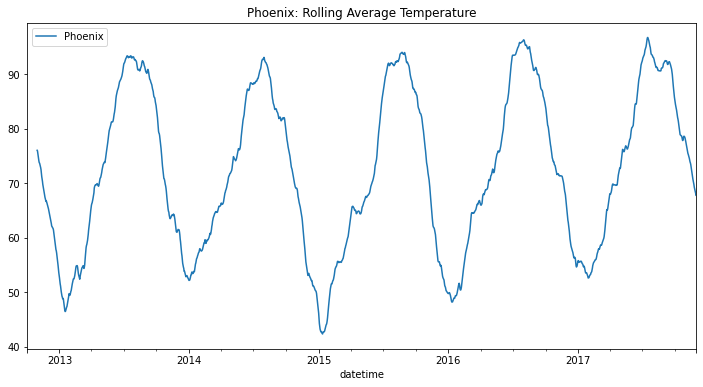

In [226]:
# Create a rolling average, using 30 observations and weighting by the mean ('boxcar' approach)
rolling = day_temp['Phoenix'].rolling(window=30, win_type='boxcar')
# Calculate the mean from the rolling window
rolling_mean = rolling.mean()
# Create data frame from rolling_mean
rolling_mean_df = pd.DataFrame(rolling_mean)
# plot the moving average
rolling_mean_df.plot(figsize=(12,6), title='Phoenix: Rolling Average Temperature')
# Display the plot
plt.show()

**Houston**

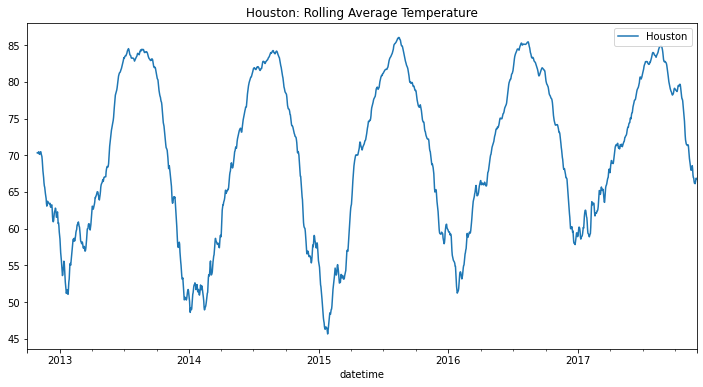

In [227]:
# Create a rolling average, using 30 observations and weighting by the mean
rolling2 = day_temp['Houston'].rolling(window=30, win_type='boxcar')
# Calculate the mean from the rolling window
rolling_mean2 = rolling2.mean()
# Create data frame from rolling_mean
rolling_mean_df2 = pd.DataFrame(rolling_mean2)
# plot the moving average
rolling_mean_df2.plot(figsize=(12,6), title='Houston: Rolling Average Temperature')
# Display the plot
plt.show()

**7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.**
    
   **Graph the predicted values 30 days out.**

In [ ]:
# D the number of transformation needed to make stationary the time series = 1
# P indicates the Auto Regressive order for the seasonal component
# Q indicated the Moving Average order for the seasonal component
# M indicates the periodicity, i.e. the number of periods in season

In [232]:
# Selected cities: Atlanta, Miami, Detroit, Seattle, and Denver

# Import module to use SARIMAX function 
# The 'X' just means you can also use exogonous variables, if needed. 
     # exogonous = variables not affected by other variables
from statsmodels.tsa.statespace.sarimax import SARIMAX

# define model configuration

# Trend elements
   # p = autoregression order = 1
   # d = difference order = 1
   # q = moving average order = 1
my_order = (1, 1, 1)

# Seasonal Elements
    # P = seasonal autoregression order = 1
    # D = seasonal difference order = 1
    # Q = seasonal moving average order = 1
    # m = time step for single seasonal period 12 (12 months in year).
my_seasonal_order = (1, 1, 1, 12)

In [244]:
# Drop NAs from data set
temp_no_na = day_temp.dropna()

# Make a city list to iterate through
city_list = ['Atlanta', 'Miami', 'Detroit', 'Seattle', 'Denver']
# Empty list to append SARIMAX results
results_list = []

# Iterate through city list
for city in city_list:
    # Run SARIMA
    model = SARIMAX(day_temp[city], order=my_order, seasonal_order=my_seasonal_order)
    # Fit the model and store as 'results'
    results = model.fit()
    # Append those results to our empty results list
    results_list.append(results)

# print results to confirm the name spaces are there
results_list

In [256]:
# Use for loop to check our indexes
for i, value in enumerate(results_list):
    print(i,value)

0 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001A14300F6A0>
1 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001A143029F40>
2 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001A14A1144F0>
3 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001A1430011F0>
4 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001A14A114220>


## 1. Atlanta Results

In [260]:
# Atlanta summary
results_list[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Atlanta   No. Observations:                 1887
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5703.983
Date:                            Sun, 05 Dec 2021   AIC                          11417.967
Time:                                    18:54:03   BIC                          11445.646
Sample:                                10-01-2012   HQIC                         11428.164
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3825      0.090     -4.241      0.000      -0.559      -0.206
ma.L1          0.5357      0.082      6.520      0.000       0.375       0.697
ar.S.L12      -0.0083      0.019     -0.429      0.668      -0.046       0.030
ma.S.L12      -0.9962      0.024    -40.748      0.000      -1.044      -0.948
sigma2        25.0418      0.735     34.068      0.000      23.601      26.482
===================================================================================
Ljung-Box (L1) (Q):                   2.19   Jarque-Bera (JB):               599.75
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [268]:
#plot the forecasted temperature for the next 30 days
Atlanta_df = pd.DataFrame(results_list[0].forecast(steps=30))

<AxesSubplot:title={'center':'Atlanta Weather Prediction'}>

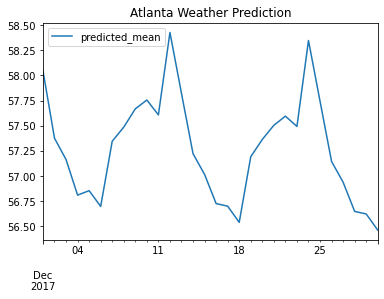

In [267]:
# Plot the data
Atlanta_df.plot(title='Atlanta Weather Prediction')

## 2. Miami Results

In [261]:
# Miami summary
results_list[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Miami   No. Observations:                 1887
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4501.040
Date:                            Sun, 05 Dec 2021   AIC                           9012.081
Time:                                    18:55:24   BIC                           9039.760
Sample:                                10-01-2012   HQIC                          9022.278
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7077      0.019     36.536      0.000       0.670       0.746
ma.L1         -0.9349      0.011    -86.330      0.000      -0.956      -0.914
ar.S.L12       0.0257      0.019      1.354      0.176      -0.011       0.063
ma.S.L12      -0.9996      0.242     -4.137      0.000      -1.473      -0.526
sigma2         7.5295      1.775      4.241      0.000       4.050      11.009
===================================================================================
Ljung-Box (L1) (Q):                  46.66   Jarque-Bera (JB):              2606.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Miami Weather Prediction'}>

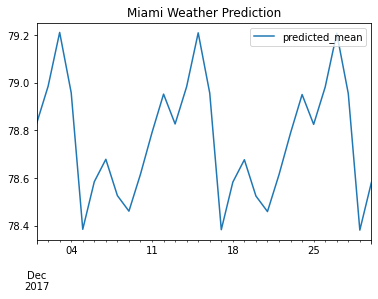

In [269]:
#plot the forecasted temperature for the next 30 days
Miami_df = pd.DataFrame(results_list[1].forecast(steps=30))

# Plot the data
Miami_df.plot(title='Miami Weather Prediction')

## 3. Detroit Results

In [262]:
# Detroit summary
results_list[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Detroit   No. Observations:                 1887
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6029.471
Date:                            Sun, 05 Dec 2021   AIC                          12068.941
Time:                                    18:55:45   BIC                          12096.620
Sample:                                10-01-2012   HQIC                         12079.138
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6652      0.027     24.662      0.000       0.612       0.718
ma.L1         -0.8958      0.016    -54.401      0.000      -0.928      -0.864
ar.S.L12      -0.0104      0.022     -0.479      0.632      -0.053       0.032
ma.S.L12      -0.9986      0.066    -15.099      0.000      -1.128      -0.869
sigma2        35.3423      2.406     14.690      0.000      30.627      40.058
===================================================================================
Ljung-Box (L1) (Q):                  35.68   Jarque-Bera (JB):                63.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Detroit Weather Prediction'}>

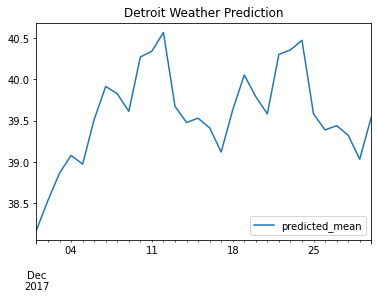

In [270]:
#plot the forecasted temperature for the next 30 days
Detroit_df = pd.DataFrame(results_list[2].forecast(steps=30))

# Plot the data
Detroit_df.plot(title='Detroit Weather Prediction')

## 4. Seattle Results

In [263]:
# Seattle summary
results_list[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Seattle   No. Observations:                 1887
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4920.773
Date:                            Sun, 05 Dec 2021   AIC                           9851.545
Time:                                    18:55:58   BIC                           9879.225
Sample:                                10-01-2012   HQIC                          9861.742
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3224      0.139     -2.324      0.020      -0.594      -0.051
ma.L1          0.4493      0.128      3.497      0.000       0.197       0.701
ar.S.L12       0.0012      0.023      0.053      0.957      -0.044       0.046
ma.S.L12      -0.9994      0.129     -7.735      0.000      -1.253      -0.746
sigma2        10.8256      1.404      7.708      0.000       8.073      13.578
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                81.09
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Seattle Weather Prediction'}>

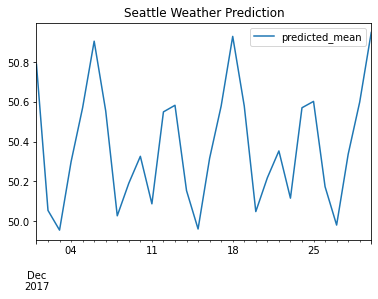

In [271]:
#plot the forecasted temperature for the next 30 days
Seattle_df = pd.DataFrame(results_list[3].forecast(steps=30))

# Plot the data
Seattle_df.plot(title='Seattle Weather Prediction')

## 5. Denver Results

In [264]:
# Denver summary
results_list[4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Denver   No. Observations:                 1887
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6196.342
Date:                            Sun, 05 Dec 2021   AIC                          12402.683
Time:                                    18:56:14   BIC                          12430.363
Sample:                                10-01-2012   HQIC                         12412.880
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5253      0.074     -7.062      0.000      -0.671      -0.380
ma.L1          0.6770      0.063     10.688      0.000       0.553       0.801
ar.S.L12      -0.0210      0.020     -1.026      0.305      -0.061       0.019
ma.S.L12      -0.9920      0.012    -82.474      0.000      -1.016      -0.968
sigma2        42.4685      1.027     41.349      0.000      40.455      44.482
===================================================================================
Ljung-Box (L1) (Q):                   8.15   Jarque-Bera (JB):               311.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.37
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Denver Weather Prediction'}>

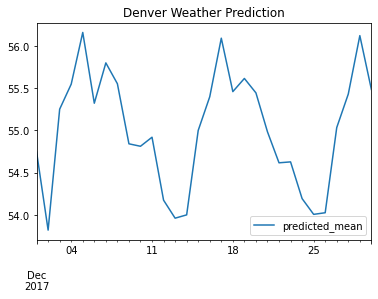

In [272]:
#plot the forecasted temperature for the next 30 days
Denver_df = pd.DataFrame(results_list[4].forecast(steps=30))

# Plot the data
Denver_df.plot(title='Denver Weather Prediction')

**8.	Explain what you see when you perform results.summary() on the cities in question 7.**

When I perform the results.summary(), I notice that the SARIMA model fits differently on each city, despite them all being from the same data set. This could mean that some cities better lend themselves to weather forecasting than others. For example, when compared to all of the other cities, it appears that the Miami model had the best fit. I determined this because the Log Liklihood value (-4501.04) was the highest for that city, compared to the others. Likewise, Miami had the lowest AIC and BIC values (9012.081 and 9039.76, respectively). This indicates that the SARIMA model is a better fit for Miami than the other cities. Contrastingly, the Denver model was the worst fit, with the lowest log liklihood of (-6196.342) and high AIC/BIC values of (12402.683 and 12430.363, respectively).  

The autoregressive lag variable (ar.L1), the moving average lag variable (ma.L1), the seasonal moving average lag variable (ma.S.L12), and the error term (sigma2) are all significant for every city because the p-values are less than 0.05 and the confidence intervals do not cross zero. However, the seasonal autoregressive lag variables (ar.S.L12) are not significant for any model. 

The Ljung-Box test indicates whether the errors in our model are just 'white noise.' Denver, Detroit, and Miami all had significant results for this test, so we accept the null hypothesis that the errors are just 'white noise.' However, the test was *not* significant for Atlanta nor Seattle. For this two cities, we fail to reject the null hypothesis. 

Atlanta, Miami, Detroit, and Seattle all had significant p-values when testing for heteroskedasticity. This potentially poses an issue with our forecasting for these cities. Because the p-value is below 0.05, we fail to reject the null hypothesis. Basically, the variance of our errors do *not* remain constant over the course of the model. This is bad for predictions. Contrastingly, Denver was not significant for this test. 

According to the Jarque-Bera test, which also has a p-value close to zero, our data are not normally distributed, for any city. Most of the cities have a slight negative skew. 

In sum, these models do an okay job fitting to the data. However, there would definitely need to be improvements to our models in order to be more confident with our weather forecasting.

**Bonus:**

**What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.**

- ARCH stands for "autoregressive conditional heteroskedasticity"
- GARCH stands for "generalized autoregressive conditional heteroskedasticity"

**Definitions of each part of the name**
    - Generalized: Indicates that we are taking sample values and applying the results to the full population. This allows us to make inferences and about populations, using only sample values
    - Autoregressive: The predictive variable is regressed on itself (its own prior values) in order to predict an outcome
    - Conditional: When a requirement needs to be made. In this case, the model is conditional on the heteroskedasticity of the data
    - Heteroskedasticity: In any predictive model, there will be error terms/residuals. If the errors are uniformally distributed, we would say the errors are homoskedastic, which indicates you could run a linear model. However, error terms are frequentyly clustered in different locations and/or conform to a pattern that is NOT uniform. These instances are **heteroskedastic.**
        - Putting those two together...'Conditional Heteroskedasticity' specifcally means we are looking at the prior period's (i.e. daily) volatility (as opposed to unconditional, which is more general and not specifically about the prior point). 
        
**Uses for ARCH and GARCH**
- Heteroskedasticity is an issue for many types of models because it can make forecasting more challenging (or inaccurate). The ARCH and GARCH models, however, can allows us to model the change in variance over time. In simple terms the expected variance can be modeled, based on past residuals (the difference between expected and true values). These models are used popularly in the financial industry to help measure volatility in the market. 

**Difference between ARCH and GARCH**
- ARCH uses a lagged error parameter to help predict future/expected variance. The GARCH model is basically an extension of the ARCH. It adds a moving average component to the model, where we look at lagged variance *in addition* to the lagged residuals. Again, residual errors are the difference between the true error and our expected/predicted error.

## ARCH Models

In [67]:
# Test with Atlanta data
Atlanta = day_temp.copy()

<AxesSubplot:xlabel='datetime'>

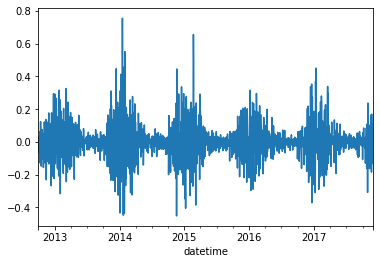

In [23]:
# Find stationarity
Atlanta['Atlanta_s']=Atlanta['Atlanta'].pct_change()
Atlanta['Atlanta_s'].plot()

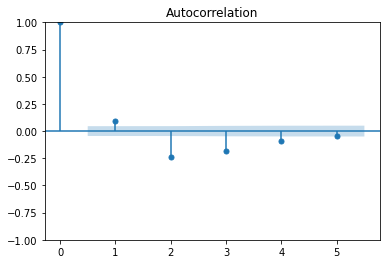

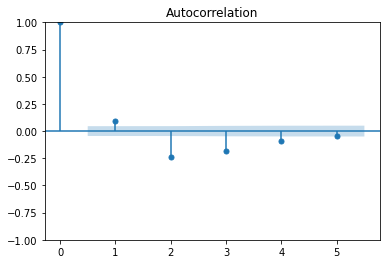

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Run autocorrelation to help us determine our p and q lag terms for the ARCH/GARCH models

# signifant until approximately term 5
# Use term 4 as the parameter for the ARCH model
plot_acf(Atlanta[['Atlanta_s']],lags=5, missing='drop') 

# missing is 'drop' to drop the NaNs

Now that lag terms have been determined on the Atlanta variable, we will use the same lag terms for all of the other cities, for the purposes of being able to iterate through everything at once.

Code below iterates through the models

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10248.0436958315
Iteration:      2,   Func. Count:     13,   Neg. LLF: 10247.487274871744
Iteration:      3,   Func. Count:     19,   Neg. LLF: 10246.902285712204
Iteration:      4,   Func. Count:     25,   Neg. LLF: 10246.87714589181
Iteration:      5,   Func. Count:     31,   Neg. LLF: 10246.876620755029
Iteration:      6,   Func. Count:     37,   Neg. LLF: 10246.876506201237
Iteration:      7,   Func. Count:     43,   Neg. LLF: 10246.87584129244
Iteration:      8,   Func. Count:     49,   Neg. LLF: 10246.872479700482
Iteration:      9,   Func. Count:     55,   Neg. LLF: 10246.855621841903
Iteration:     10,   Func. Count:     61,   Neg. LLF: 10246.778646528981
Iteration:     11,   Func. Count:     67,   Neg. LLF: 11221.187983817943
Iteration:     12,   Func. Count:     75,   Neg. LLF: 10246.227571248637
Iteration:     13,   Func. Count:     81,   Neg. LLF: 10245.846856004882
Iteration:     14,   Func. Count:     87,   Neg. LLF: 1

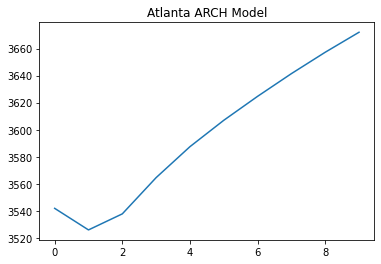

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10682.060433186976
Iteration:      2,   Func. Count:     13,   Neg. LLF: 10682.731229820938
Iteration:      3,   Func. Count:     20,   Neg. LLF: 10681.813497023142
Iteration:      4,   Func. Count:     26,   Neg. LLF: 10681.813493417802
Iteration:      5,   Func. Count:     31,   Neg. LLF: 10681.813493401958
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10681.813493417802
            Iterations: 5
            Function evaluations: 31
            Gradient evaluations: 5


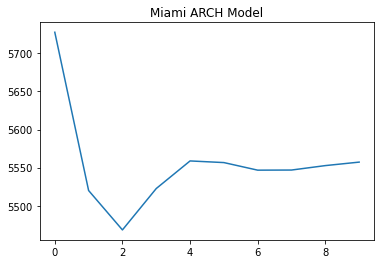

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9768.67454820068
Iteration:      2,   Func. Count:     13,   Neg. LLF: 9765.104668049573
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9763.506569104742
Iteration:      4,   Func. Count:     27,   Neg. LLF: 9759.595494847936
Iteration:      5,   Func. Count:     34,   Neg. LLF: 9758.062124717237
Iteration:      6,   Func. Count:     40,   Neg. LLF: 9758.031120223877
Iteration:      7,   Func. Count:     46,   Neg. LLF: 9757.924622901312
Iteration:      8,   Func. Count:     52,   Neg. LLF: 9757.654141587955
Iteration:      9,   Func. Count:     58,   Neg. LLF: 9757.070965277582
Iteration:     10,   Func. Count:     64,   Neg. LLF: 9756.034896714586
Iteration:     11,   Func. Count:     70,   Neg. LLF: 9754.898173543177
Iteration:     12,   Func. Count:     76,   Neg. LLF: 9758.11294552781
Iteration:     13,   Func. Count:     83,   Neg. LLF: 9756.266676266907
Iteration:     14,   Func. Count:     90,   Neg. LLF: 9753.9450237

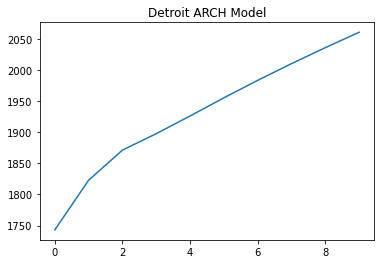

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9938.269528701989
Iteration:      2,   Func. Count:     13,   Neg. LLF: 9938.220912223502
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9938.128832351405
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9938.128776443753
Iteration:      5,   Func. Count:     32,   Neg. LLF: 9938.128607560106
Iteration:      6,   Func. Count:     38,   Neg. LLF: 9938.12825832869
Iteration:      7,   Func. Count:     44,   Neg. LLF: 9938.127064060482
Iteration:      8,   Func. Count:     50,   Neg. LLF: 9938.124411689445
Iteration:      9,   Func. Count:     56,   Neg. LLF: 9938.115898383108
Iteration:     10,   Func. Count:     62,   Neg. LLF: 9938.104568258896
Iteration:     11,   Func. Count:     68,   Neg. LLF: 9938.090536271446
Iteration:     12,   Func. Count:     74,   Neg. LLF: 9940.573820233221
Iteration:     13,   Func. Count:     81,   Neg. LLF: 9937.98254097483
Iteration:     14,   Func. Count:     87,   Neg. LLF: 9937.8953771

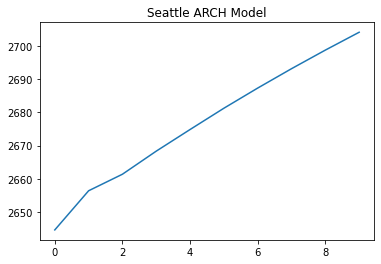

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9793.90828499425
Iteration:      2,   Func. Count:     13,   Neg. LLF: 9795.49182175193
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9785.082842541873
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9784.138699349214
Iteration:      5,   Func. Count:     32,   Neg. LLF: 9784.108583197687
Iteration:      6,   Func. Count:     38,   Neg. LLF: 9784.078238210546
Iteration:      7,   Func. Count:     44,   Neg. LLF: 9783.91269848391
Iteration:      8,   Func. Count:     50,   Neg. LLF: 9783.189323136225
Iteration:      9,   Func. Count:     56,   Neg. LLF: 11162.341887015922
Iteration:     10,   Func. Count:     64,   Neg. LLF: 9793.342839279725
Iteration:     11,   Func. Count:     71,   Neg. LLF: 9780.2934282239
Iteration:     12,   Func. Count:     77,   Neg. LLF: 9779.978282592892
Iteration:     13,   Func. Count:     83,   Neg. LLF: 9779.752588457475
Iteration:     14,   Func. Count:     89,   Neg. LLF: 9779.720833464

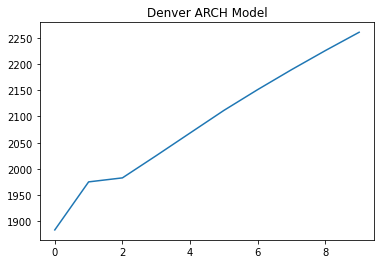

In [69]:
# Drop NAs from data set
temp_no_na = day_temp.dropna()

# Make a city list to iterate through
city_list = ['Atlanta', 'Miami', 'Detroit', 'Seattle', 'Denver']

# For loop to iteratively create the ARCH models for every city in our list
for city in city_list:
    # Define the ARCH Model
    ARCH = arch_model(temp_no_na[city], mean='Zero', vol='ARCH', p=4)
    # Fit model
    ARCH_fit = ARCH.fit()
    # forecast results using variance from the last 10 time steps
    ARCH_predict = ARCH_fit.forecast(horizon=10)

    # plot forecast variance

    # This plots the last index of the 'prediction' data set, which holds our predicted variance values
    # It plots every time step of that index (all the columns). 
    #In this case, 10 time steps, since that is what's specified
    plt.plot(ARCH_predict.variance.values[-1, :])
    plt.title(str(city)+' ARCH Model')
    plt.show()

### ARCH Summary

- Atlanta: Predicted variance is steadily increasing over time
- Miami: Predicted variance is sharply decreasing at first, followed by a slight increase before leveling out
- Detroit: Predicted variance is steadily increasing over time
- Seattle: Predicted variance is steadily increasing over time
- Denver: Predicted variance is steadily increasing over time, with the exception of a short plateau at time step 1

### GARCH Models

Iteration:      1,   Func. Count:     11,   Neg. LLF: 52141.83664902835
Iteration:      2,   Func. Count:     24,   Neg. LLF: 10247.230244156268
Iteration:      3,   Func. Count:     34,   Neg. LLF: 10247.667098974007
Iteration:      4,   Func. Count:     45,   Neg. LLF: 10245.985241025985
Iteration:      5,   Func. Count:     55,   Neg. LLF: 10245.934149199122
Iteration:      6,   Func. Count:     65,   Neg. LLF: 10245.948060830195
Iteration:      7,   Func. Count:     76,   Neg. LLF: 10245.923582207604
Iteration:      8,   Func. Count:     86,   Neg. LLF: 10245.923408682489
Iteration:      9,   Func. Count:     96,   Neg. LLF: 10245.922749952966
Iteration:     10,   Func. Count:    106,   Neg. LLF: 10245.922393979265
Iteration:     11,   Func. Count:    116,   Neg. LLF: 10245.922377797015
Iteration:     12,   Func. Count:    126,   Neg. LLF: 10245.922286486462
Iteration:     13,   Func. Count:    136,   Neg. LLF: 10245.921797749756
Iteration:     14,   Func. Count:    146,   Neg. LLF

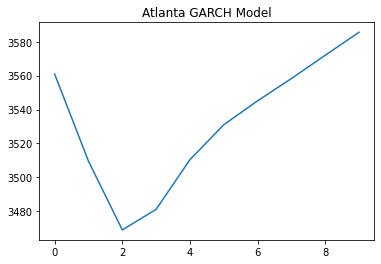

Iteration:      1,   Func. Count:     11,   Neg. LLF: 10682.105639431094
Iteration:      2,   Func. Count:     21,   Neg. LLF: 10982.112351530726
Iteration:      3,   Func. Count:     33,   Neg. LLF: 10693.050724250377
Iteration:      4,   Func. Count:     44,   Neg. LLF: 10681.683580651155
Iteration:      5,   Func. Count:     54,   Neg. LLF: 10681.692865647623
Iteration:      6,   Func. Count:     65,   Neg. LLF: 10681.67797099404
Iteration:      7,   Func. Count:     75,   Neg. LLF: 10681.677962637736
Iteration:      8,   Func. Count:     85,   Neg. LLF: 10681.677959871795
Iteration:      9,   Func. Count:     94,   Neg. LLF: 10681.677959871795
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10681.677959871795
            Iterations: 9
            Function evaluations: 94
            Gradient evaluations: 9


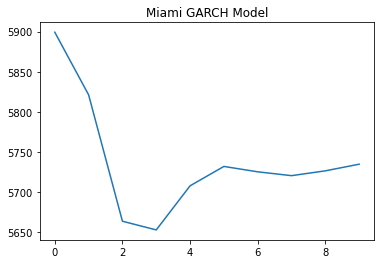

Iteration:      1,   Func. Count:     11,   Neg. LLF: 51985.153422660136
Iteration:      2,   Func. Count:     23,   Neg. LLF: 9761.571750521189
Iteration:      3,   Func. Count:     33,   Neg. LLF: 9787.682903404515
Iteration:      4,   Func. Count:     44,   Neg. LLF: 9771.642161698188
Iteration:      5,   Func. Count:     56,   Neg. LLF: 9755.71400055735
Iteration:      6,   Func. Count:     66,   Neg. LLF: 9755.215713076595
Iteration:      7,   Func. Count:     77,   Neg. LLF: 9754.721525201134
Iteration:      8,   Func. Count:     88,   Neg. LLF: 9754.101300949427
Iteration:      9,   Func. Count:     98,   Neg. LLF: 9754.03937939292
Iteration:     10,   Func. Count:    108,   Neg. LLF: 9754.037004908118
Iteration:     11,   Func. Count:    118,   Neg. LLF: 9754.02955777771
Iteration:     12,   Func. Count:    128,   Neg. LLF: 9754.023985135103
Iteration:     13,   Func. Count:    138,   Neg. LLF: 9754.011447613248
Iteration:     14,   Func. Count:    148,   Neg. LLF: 9753.9938590

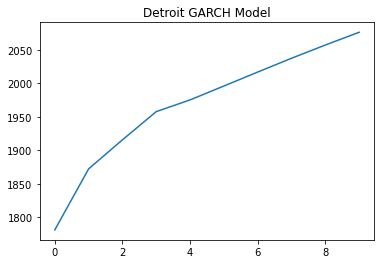

Iteration:      1,   Func. Count:     11,   Neg. LLF: 51826.265967427
Iteration:      2,   Func. Count:     24,   Neg. LLF: 9938.059579348625
Iteration:      3,   Func. Count:     34,   Neg. LLF: 9938.047085425429
Iteration:      4,   Func. Count:     45,   Neg. LLF: 9937.884082767936
Iteration:      5,   Func. Count:     55,   Neg. LLF: 9937.880186598883
Iteration:      6,   Func. Count:     65,   Neg. LLF: 9937.880091243016
Iteration:      7,   Func. Count:     75,   Neg. LLF: 9937.879765593989
Iteration:      8,   Func. Count:     85,   Neg. LLF: 9937.879556222084
Iteration:      9,   Func. Count:     95,   Neg. LLF: 9937.879471741777
Iteration:     10,   Func. Count:    105,   Neg. LLF: 9937.879460003012
Iteration:     11,   Func. Count:    115,   Neg. LLF: 9937.879455815986
Iteration:     12,   Func. Count:    125,   Neg. LLF: 9937.879442624027
Iteration:     13,   Func. Count:    135,   Neg. LLF: 9937.87942860778
Iteration:     14,   Func. Count:    145,   Neg. LLF: 9937.87934457

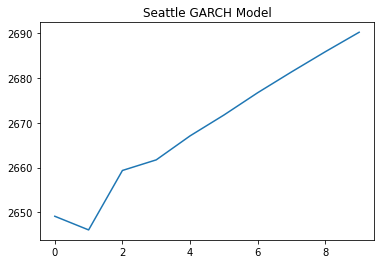

Iteration:      1,   Func. Count:     11,   Neg. LLF: 51844.24325893994
Iteration:      2,   Func. Count:     23,   Neg. LLF: 9786.609996766656
Iteration:      3,   Func. Count:     33,   Neg. LLF: 9804.389484201445
Iteration:      4,   Func. Count:     45,   Neg. LLF: 9781.822425591556
Iteration:      5,   Func. Count:     56,   Neg. LLF: 9781.018457683564
Iteration:      6,   Func. Count:     66,   Neg. LLF: 9780.950115929365
Iteration:      7,   Func. Count:     76,   Neg. LLF: 9780.92092217184
Iteration:      8,   Func. Count:     86,   Neg. LLF: 9780.875974771185
Iteration:      9,   Func. Count:     96,   Neg. LLF: 9780.869158893827
Iteration:     10,   Func. Count:    106,   Neg. LLF: 9780.86700053886
Iteration:     11,   Func. Count:    116,   Neg. LLF: 9780.86311801459
Iteration:     12,   Func. Count:    126,   Neg. LLF: 9780.852666751607
Iteration:     13,   Func. Count:    136,   Neg. LLF: 9780.825289895756
Iteration:     14,   Func. Count:    146,   Neg. LLF: 9780.75895877

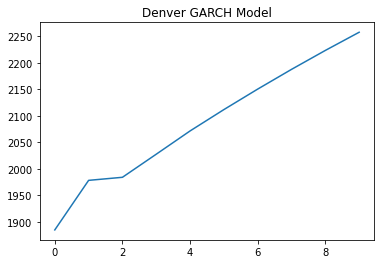

In [66]:
# Drop NAs from data set
temp_no_na = day_temp.dropna()

# Make a city list to iterate through
city_list = ['Atlanta', 'Miami', 'Detroit', 'Seattle', 'Denver']

# For loop to iteratively create the GARCH models for every city in our list
for city in city_list:
    # Define the GARCH Model
    GARCH = arch_model(temp_no_na[city], mean='Zero', vol='GARCH', p=4, q=4)
    # Fit model
    GARCH_fit = GARCH.fit()
    # forecast results using variance from the last 10 time steps
    GARCH_predict = GARCH_fit.forecast(horizon=10)

    # plot forecast variance

    # This plots the last index of the 'prediction' data set, which holds our predicted variance values
    # It plots every time step of that index (all the columns). 
    #In this case, 10 time steps, since that is what's specified
    plt.plot(GARCH_predict.variance.values[-1, :])
    plt.title(str(city)+' GARCH Model')
    plt.show()

### GARCH Summary
- Atlanta: Variance is sharply decreasing at first, followed by a steady increase
- Miami: Variance is sharply decreasing, followed by slight increases before leveling off
- Detroit: Variance is steadily increasing throughout
- Seattle: Overall, variance is increasing, aside from a short decrease at the first time step
- Denver: Variance is steadily increasing over time, aside from a short plateau at the first time step

### Data Camp Completion Certificate

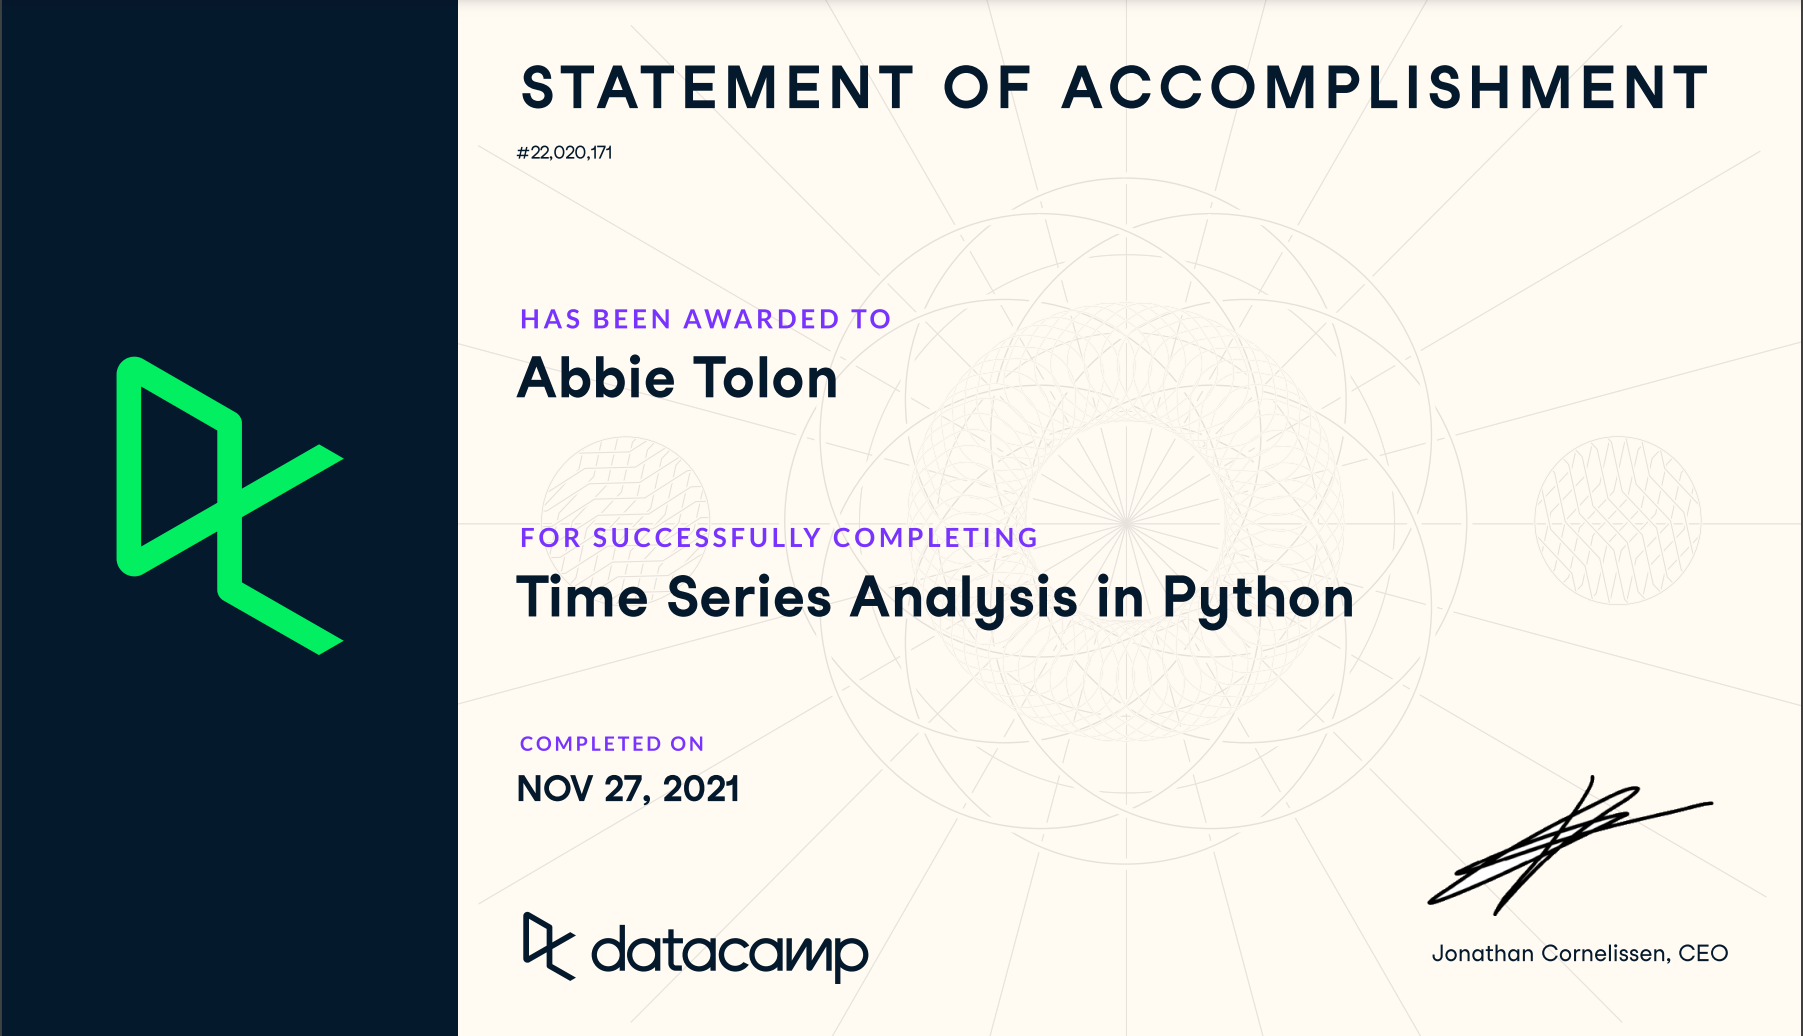